

## Table of contents

1. Dataset Description


2. Exploratory Data Analysis (EDA)


### Gender Related Visualizations


3. Descriptive Statistics


4. Hypothesis Testing


5. Effect size


6. Theil Index


7. Demographic Parity


8. Disparate Impact

## Unveiling Gender Bias: Statistical Analyses of Salary Prediction Data
Gender bias refers to the unequal and often unjust treatment or representation of individuals based on their gender. This pervasive issue can manifest in various aspects of life, such as education, employment, healthcare, and social interactions. Whether intentional or unintentional, gender bias is deeply ingrained in societal norms, perpetuated stereotypes, and historical practices.

To systematically identify and evaluate gender bias, statistical analyses are frequently employed, particularly when examining datasets like the one used in this analysis, available at https://www.kaggle.com/datasets/mohithsairamreddy/salary-data. Statistical approaches aid in uncovering patterns or disparities that may indicate unequal treatment based on gender.

Here are some commonly used statistical methods to assess gender bias:

## Packages for EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import entropy

## Dataset description
### Load The data

In [2]:
salary_df = pd.read_csv("/Users/nidupdorji/Desktop/salaryPrediction/Salary_Data.csv")
salary_df

Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...                   ...       ...  
6699                 20.0  200000.0  
6700                  3.0   50000.0  
6701                  4.0   55000.0  
6702                 14.0  140000.0  
6703                  1.0   35000.0  

[6704 rows x 6 columns]

In [3]:
salary_df.shape

(6704, 6)

In [4]:
# Generate summary statistics for the dataset
dataset_summary = salary_df.describe()

# Display the summary statistics
print("Summary Statistics of the Salary Prediction Dataset:")
dataset_summary

Summary Statistics of the Salary Prediction Dataset:


Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [5]:
# Display data types of each column
salary_df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [6]:
# Check for null values
null_values = salary_df.isnull().sum()

# Display the null values count for each column
print(null_values)

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [7]:
# Drop rows with null or NaN values
salary_df = salary_df.dropna()

# Check for null values
null_values = salary_df.isnull().sum()

# Display the null values count for each column
print(null_values)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) serves as a crucial method for identifying and mitigating bias within data. An effective approach involves employing visualizations to scrutinize the distribution of features and the target variable among diverse demographic groups.

Utilizing tools such as histograms, box plots, and density plots unveils patterns and disparities, facilitating a comprehensive understanding of potential sources of bias in the dataset. This method not only aids in recognizing existing imbalances but also provides insights for implementing corrective measures.

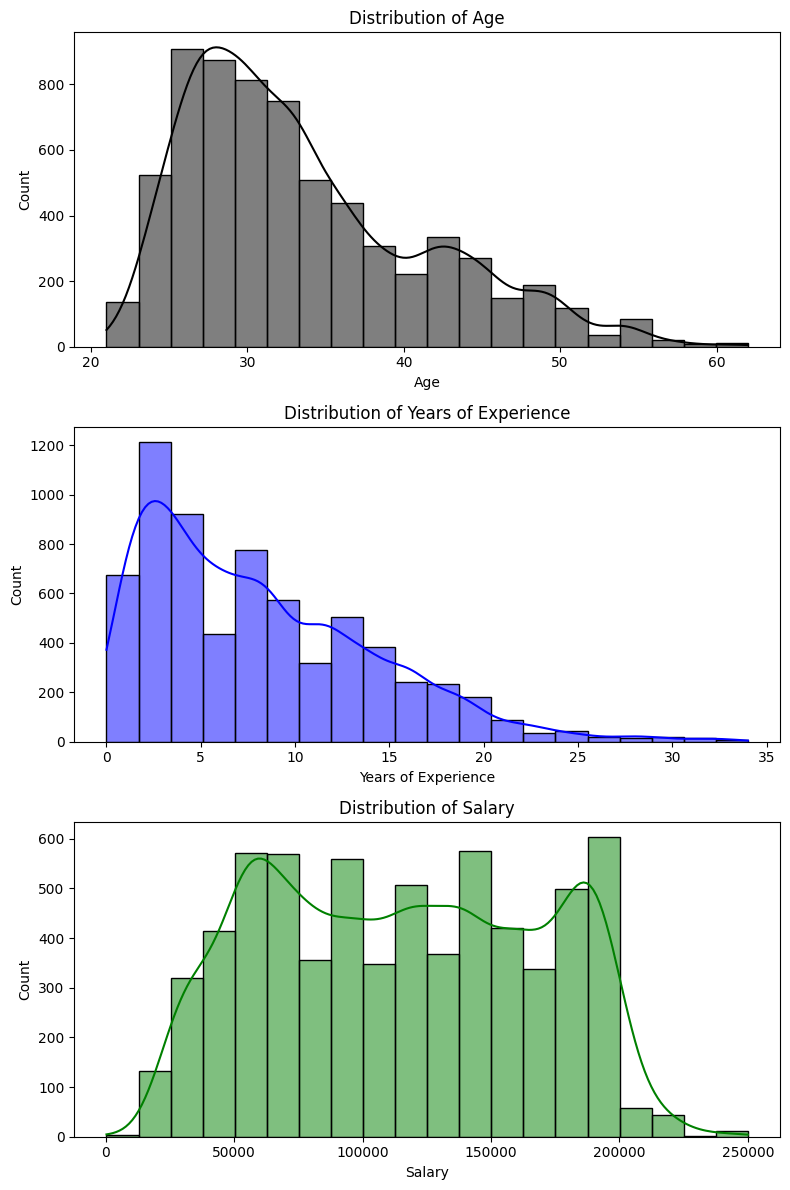

In [8]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Plot histograms for Age, Years of Experience, and Salary
sns.histplot(salary_df['Age'], bins=20, kde=True, ax=axes[0], color='black')
axes[0].set_title('Distribution of Age')

sns.histplot(salary_df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='blue')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(salary_df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

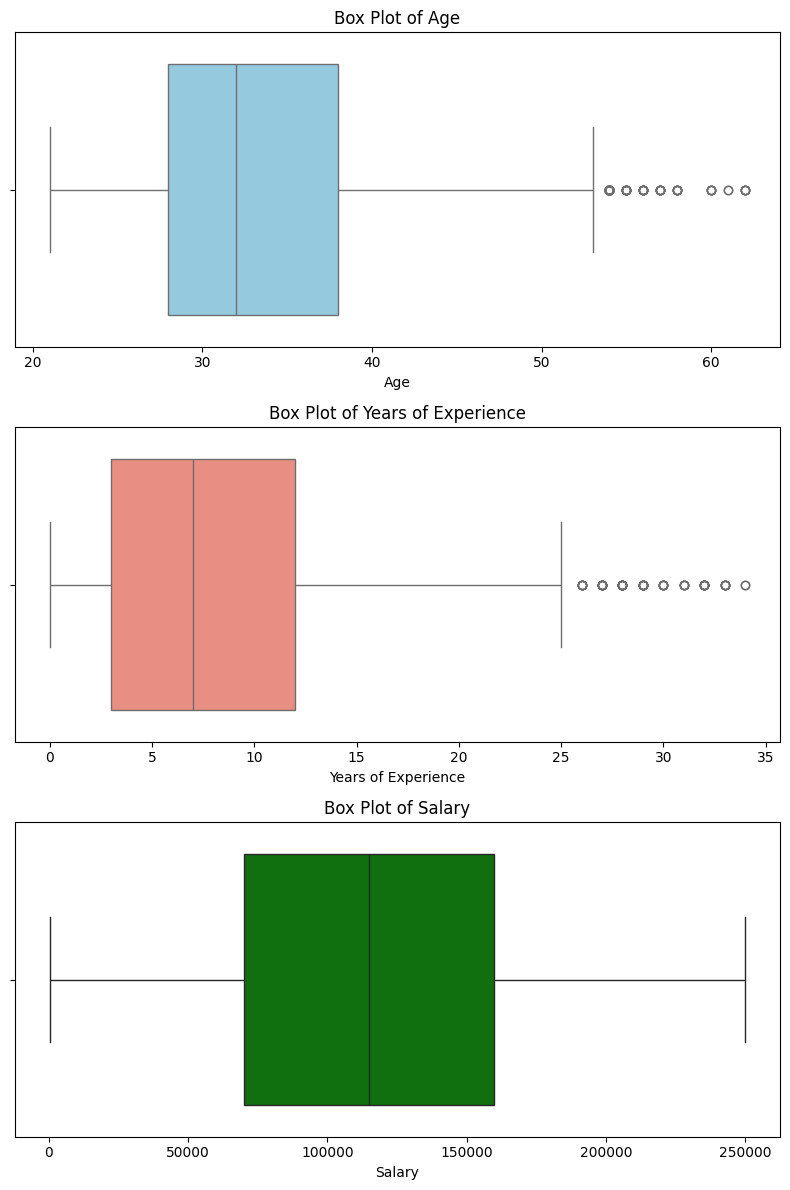

In [9]:
# Box plots for Age, Years of Experience, and Salary
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

sns.boxplot(x=salary_df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=salary_df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=salary_df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

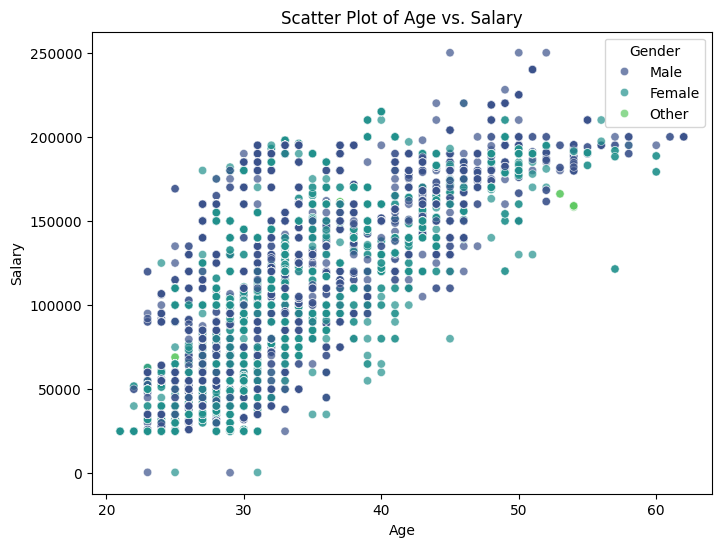

In [10]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Scatter plot for Age and Salary
sns.scatterplot(x='Age', y='Salary', data=salary_df, hue='Gender', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Salary')

# Show plot
plt.show()

## Gender related visualization

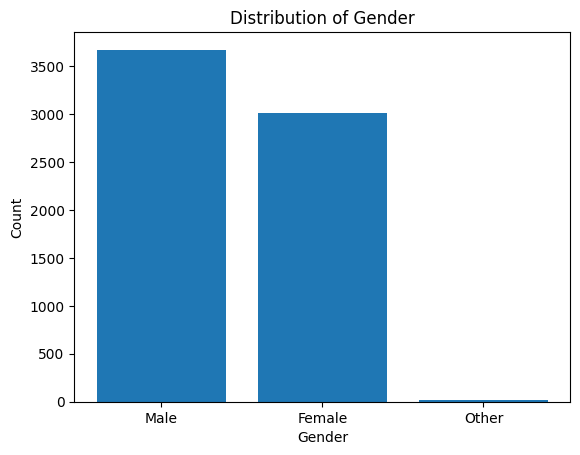

In [11]:
# Extract the counts of each gender from the 'Gender' column in the salary_df DataFrame
gender_counts = salary_df['Gender'].value_counts()

# Plot a bar chart to visualize the distribution of genders
plt.bar(gender_counts.index, gender_counts)

# Set labels for the x and y axes, and provide a title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Display the plot
plt.show()

/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/4103415165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')


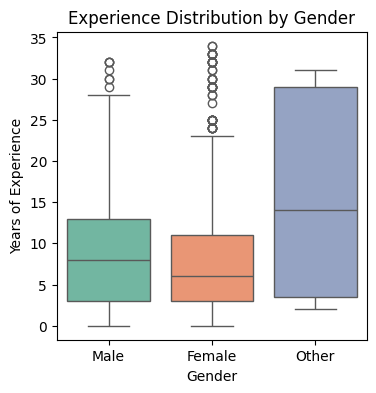

In [12]:
# Set up the figure and axes
plt.figure(figsize=(4,4))

# Box plot for Experience grouped by Gender
sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')
plt.title('Experience Distribution by Gender')

# Show plot
plt.show()

/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/2697397345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')


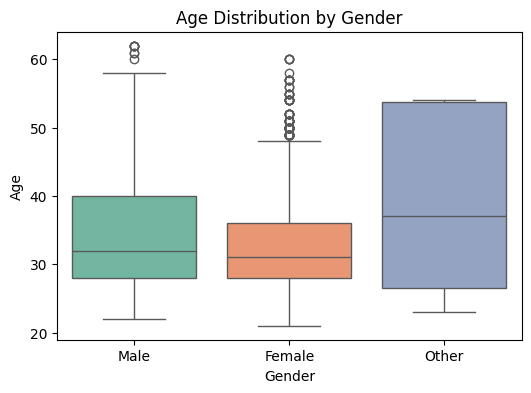

In [13]:
# Set up the figure and axes
plt.figure(figsize=(6, 4))

# Box plot for Age grouped by Gender
sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')
plt.title('Age Distribution by Gender')

# Show plot
plt.show()

/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/900012216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')


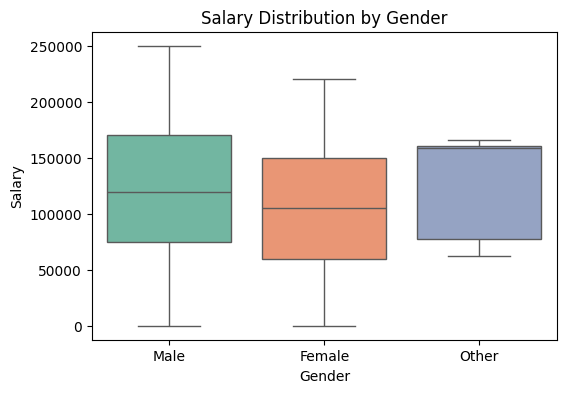

In [14]:
# Set up the figure and axes
plt.figure(figsize=(6, 4))

# Box plot for Salary grouped by Gender
sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')
plt.title('Salary Distribution by Gender')

# Show plot
plt.show()

## 2. Descriptive Statistics¶
Compute summary statistics for different demographic groups. Look at mean, median, standard deviation, and quartiles for features and the target variable across various groups.

Interpretation of the Results:

For the 'Female' group:

Count: 3013 observations
Mean age: Approximately 32.63 years
Median age: 31 years
Standard deviation: Approximately 6.98 years
For the 'Male' group:

Count: 3671 observations
Mean age: Approximately 34.42 years
Median age: 32 years
Standard deviation: Approximately 7.98 years
For the 'Other' group:

Count: 14 observations
Mean age: Approximately 39.57 years
Median age: 37 years
Standard deviation: Approximately 13.38 years

These statistics provide insights into the age distribution within each gender group, helping to understand the central tendency and variability of ages across different gender categories.

In [15]:
# Group the DataFrame by 'Gender' and select the 'Age' column
gender_groups = salary_df.groupby('Gender')['Age']

# Calculate summary statistics for each gender group (count, mean, median, std)
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])

# Display the summary statistics
print("Summary Statistics for Age by Gender:")
print(summary_statistics)

Summary Statistics for Age by Gender:
        count       mean  median        std
Gender                                     
Female   3013  32.626286    31.0   6.976178
Male     3671  34.418415    32.0   7.979936
Other      14  39.571429    37.0  13.380320


Interpretation of the Results:

For the 'Female' group:

Count: 3013 observations

Mean salary: Approximately $107,889

Median salary: $105,000

Standard deviation: Approximately $52,724

For the 'Male' group:

Count: 3671 observations

Mean salary: Approximately $121,396

Median salary: $120,000

Standard deviation: Approximately $52,099

For the 'Other' group:

Count: 14 observations

Mean salary: Approximately $125,870

Median salary: $158,610

Standard deviation: Approximately $44,242

These statistics provide insights into the salary distribution within each gender group, helping to understand the central tendency and variability of salaries across different gender categories.

In [16]:
# Group the DataFrame by 'Gender' and select the 'Salary' column
gender_groups = salary_df.groupby('Gender')['Salary']

# Calculate summary statistics for each gender group (count, mean, median, std)
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])

# Display the summary statistics
print("Summary Statistics for Salary by Gender:")
print(summary_statistics)

Summary Statistics for Salary by Gender:
        count           mean    median           std
Gender                                              
Female   3013  107888.998672  105000.0  52723.610035
Male     3671  121395.697630  120000.0  52098.626225
Other      14  125869.857143  158610.0  44242.382776


## Hypothesis testing
Formulate null and alternative hypotheses and perform hypothesis tests to determine if there is enough evidence to reject the null hypothesis. Common tests include t-tests, chi-square tests, ANOVA.

Example: Independent Two-Sample T-Test

Objective:

Test whether there is a significant difference in the average salary between two groups (e.g., Group A and Group B).

Hypotheses:

Null Hypothesis (H0): The mean salary of Group A is equal to the mean salary of Group B.

Alternative Hypothesis (H1): The mean salary of Group A is different from the mean salary of Group B.

Here's an interpretation of the results:

T-Statistic: 10.49

P-Value: 1.53e-25 (very close to zero)

The t-test results in a very low p-value (much smaller than the significance level of 0.05), indicating strong evidence against the null hypothesis. The null hypothesis assumes no difference in salaries between male and female groups. Since the p-value is extremely low, we reject the null hypothesis. Therefore, there is enough statistical evidence to suggest a significant difference in salaries between genders.

In [17]:
# Extract salaries for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is enough evidence to suggest a significant difference in salaries between genders.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in salaries between genders.")


T-Statistic: 10.489305680117718
P-Value: 1.5264743340303035e-25
Reject the null hypothesis. There is enough evidence to suggest a significant difference in salaries between genders.


## 4. Effect size
It quantifies the magnitude of a relationship or the difference between groups, providing a measure of practical significance. One commonly used effect size for comparing means is Cohen's d.

Effect size, as quantified by Cohen's d, provides a meaningful measure of the practical significance of a relationship or difference between groups. The interpretation of Cohen's d is as follows:

Small effect: 0.2 <= |d| < 0.5

Medium effect: 0.5 <= |d| < 0.8

Large effect: |d| >= 0.8

In simpler terms, a small effect size indicates a modest impact, a medium effect size suggests a moderate impact, and a large effect size signifies a substantial impact.

Resul: The Cohen's d value of 0.2579 suggests a small effect size. In practical terms, this means that the observed difference in salaries between genders is small and may not have substantial practical significance. Effect sizes help interpret the magnitude of differences, providing context beyond statistical significance.

In [18]:
# Extract salaries for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries)

# Calculate Cohen's d
mean_difference = male_salaries.mean() - female_salaries.mean()
pooled_std_dev = ((len(male_salaries) - 1) * male_salaries.var() + (len(female_salaries) - 1) * female_salaries.var()) / (len(male_salaries) + len(female_salaries) - 2)
cohen_d = mean_difference / (pooled_std_dev ** 0.5)

# Print Cohen's d
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.2578536030939302


## 5. Theil Index
Description: The Theil Index measures the overall inequality in a dataset, including both within-group and between-group disparities.

Calculation: It considers entropy within groups and overall entropy.

Interpretation: Higher values indicate higher inequality or bias.

Results:

Theil Index for Male (8.11): This value indicates the level of inequality in salaries among males. A higher Theil Index suggests greater inequality in salary distribution within the male group.

Theil Index for Female (7.88): Similarly, this value represents the level of inequality in salaries among females. A higher Theil Index implies more significant disparities in salary distribution within the female group.

Comparing these values, the Theil Index for males (8.11) is slightly higher than that for females (7.88). This suggests that there may be a slightly higher level of inequality in salary distribution among males compared to females in the given dataset.

In [19]:
# Extract salary values for each gender group
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

# Calculate Theil Index for each group
theil_male = entropy(male_salaries)
theil_female = entropy(female_salaries)

# Display Theil Index values
print(f"Theil Index for Male: {theil_male}")
print(f"Theil Index for Female: {theil_female}")

Theil Index for Male: 8.109797060138703
Theil Index for Female: 7.883871535489255


## 6. Demographic Parity
Demographic parity focuses on ensuring that the percentage of positive outcomes is roughly equal across different groups.

It seeks to ensure that decisions made by the model are not influenced by protected attributes like gender, race, etc.

Results:

Demographic Parity for Male (0.597): This value indicates that approximately 59.7% of males in the dataset have salaries above the $100,000 threshold.

Demographic Parity for Female (0.522): This value indicates that approximately 52.2% of females in the dataset have salaries above the $100,000 threshold. Comparison:

The demographic parity for males is higher (0.597) compared to females (0.522). This suggests that a larger proportion of males in the dataset have salaries above $100,000 compared to females.

In [20]:
# Set a salary threshold
salary_threshold = 100000

# Create a binary outcome variable indicating whether the salary is above the threshold
salary_df.loc[:, 'Outcome'] = (salary_df['Salary'] > salary_threshold).astype(int)

# Assuming 'Male' and 'Female' are the gender groups
male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

# Calculate Demographic Parity
parity_male = male_data['Outcome'].mean()
parity_female = female_data['Outcome'].mean()

# Display the results
print(f"Demographic Parity for Male: {parity_male}")
print(f"Demographic Parity for Female: {parity_female}")

Demographic Parity for Male: 0.5965676927267775
Demographic Parity for Female: 0.5217391304347826


/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/2397536654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df.loc[:, 'Outcome'] = (salary_df['Salary'] > salary_threshold).astype(int)


## 7. Disparate Impact
Disparate impact measures the difference in outcomes between different groups, such as genders. It's commonly used in the context of hiring, lending, or any decision-making process where fairness is critical. A value close to 1 indicates fairness, while values significantly deviating from 1 may suggest disparate impact.

## Interpretation of the result:

For Males:The Disparate Impact is 1.059, suggesting a slightly higher outcome rate compared to the overall dataset. It could mean that, on average, males are more likely to be predicted as having a salary above the threshold.

For Females: The Disparate Impact is 0.926, indicating a slightly lower outcome rate compared to the overall dataset. It could mean that, on average, females are less likely to be predicted as having a salary above the threshold.

It's important to note that while Disparate Impact provides a quantitative measure, interpreting its practical significance also requires considering the context of the specific application and any legal or ethical thresholds that may be in place.

In [21]:
# Assuming 'Male' and 'Female' are the gender groups
male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

# Calculate Disparate Impact for Male and Female groups
disparate_impact_male = male_data['Outcome'].mean() / salary_df['Outcome'].mean()
disparate_impact_female = female_data['Outcome'].mean() / salary_df['Outcome'].mean()

# Display the results
print(f"Disparate Impact for Male: {disparate_impact_male}")
print(f"Disparate Impact for Female: {disparate_impact_female}")

Disparate Impact for Male: 1.0593346781240602
Disparate Impact for Female: 0.9264604177232698


Addressing bias in datasets is a crucial aspect of ensuring fairness in various applications. There are several methods to identify and mitigate bias in data.

The choice of method depends on the specific context, nature of the data, and the goals of fairness in the application. Combining multiple methods might offer a more comprehensive approach to identifying and mitigating bias.

## Model Building

In [22]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
df = salary_df

In [24]:
df.head(3)

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   

     Salary  Outcome  
0   90000.0        0  
1   65000.0        0  
2  150000.0        1

In [25]:
a=df[['Education Level']]
pd.get_dummies(a)

Education Level_Bachelor's  Education Level_Bachelor's Degree  \
0                           True                              False   
1                          False                              False   
2                          False                              False   
3                           True                              False   
4                          False                              False   
...                          ...                                ...   
6699                       False                              False   
6700                       False                              False   
6701                       False                               True   
6702                       False                              False   
6703                       False                              False   

      Education Level_High School  Education Level_Master's  \
0                           False                     False   
1                           False                      True   
2                           False                     False   
3                           False                     False   
4                           False                      True   
...                           ...                       ...   
6699                        False                     False   
6700                         True                     False   
6701                        False                     False   
6702                        False                     False   
6703                         True                     False   

      Education Level_Master's Degree  Education Level_PhD  \
0                               False                False   
1                               False                False   
2                               False                 True   
3                               False                False   
4                               False                False   
...                               ...                  ...   
6699                            False                 True   
6700                            False                False   
6701                            False                False   
6702                             True                False   
6703                            False                False   

      Education Level_phD  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
6699                False  
6700                False  
6701                False  
6702                False  
6703                False  

[6698 rows x 7 columns]

In [26]:
a=df[['Education Level']]
pd.get_dummies(a,drop_first=True)

Education Level_Bachelor's Degree  Education Level_High School  \
0                                 False                        False   
1                                 False                        False   
2                                 False                        False   
3                                 False                        False   
4                                 False                        False   
...                                 ...                          ...   
6699                              False                        False   
6700                              False                         True   
6701                               True                        False   
6702                              False                        False   
6703                              False                         True   

      Education Level_Master's  Education Level_Master's Degree  \
0                        False                            False   
1                         True                            False   
2                        False                            False   
3                        False                            False   
4                         True                            False   
...                        ...                              ...   
6699                     False                            False   
6700                     False                            False   
6701                     False                            False   
6702                     False                             True   
6703                     False                            False   

      Education Level_PhD  Education Level_phD  
0                   False                False  
1                   False                False  
2                    True                False  
3                   False                False  
4                   False                False  
...                   ...                  ...  
6699                 True                False  
6700                False                False  
6701                False                False  
6702                False                False  
6703                False                False  

[6698 rows x 6 columns]

In [27]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [28]:
df.head(3)


Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   

     Salary  Outcome  
0   90000.0        0  
1   65000.0        0  
2  150000.0        1

In [29]:
pd.get_dummies(df,columns=["Gender","Education Level","Job Title"],drop_first=True)


Age  Years of Experience    Salary  Outcome  Gender_Male  Gender_Other  \
0     32.0                  5.0   90000.0        0         True         False   
1     28.0                  3.0   65000.0        0        False         False   
2     45.0                 15.0  150000.0        1         True         False   
3     36.0                  7.0   60000.0        0        False         False   
4     52.0                 20.0  200000.0        1         True         False   
...    ...                  ...       ...      ...          ...           ...   
6699  49.0                 20.0  200000.0        1        False         False   
6700  32.0                  3.0   50000.0        0         True         False   
6701  30.0                  4.0   55000.0        0        False         False   
6702  46.0                 14.0  140000.0        1         True         False   
6703  26.0                  1.0   35000.0        0        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
0                                 False                        False   
1                                 False                        False   
2                                 False                        False   
3                                 False                        False   
4                                 False                        False   
...                                 ...                          ...   
6699                              False                        False   
6700                              False                         True   
6701                               True                        False   
6702                              False                        False   
6703                              False                         True   

      Education Level_Master's  Education Level_Master's Degree  ...  \
0                        False                            False  ...   
1                         True                            False  ...   
2                        False                            False  ...   
3                        False                            False  ...   
4                         True                            False  ...   
...                        ...                              ...  ...   
6699                     False                            False  ...   
6700                     False                            False  ...   
6701                     False                            False  ...   
6702                     False                             True  ...   
6703                     False                            False  ...   

      Job Title_Supply Chain Manager  Job Title_Technical Recruiter  \
0                              False                          False   
1                              False                          False   
2                              False                          False   
3                              False                          False   
4                              False                          False   
...                              ...                            ...   
6699                           False                          False   
6700                           False                          False   
6701                           False                          False   
6702                           False                          False   
6703                           False                          False   

      Job Title_Technical Support Specialist  Job Title_Technical Writer  \
0                                      False                       False   
1                                      False                       False   
2                                      False                       False   
3                                      False                       False   
4                                      False                       Fals

In [30]:
dfdum=pd.get_dummies(df,columns=["Gender","Education Level","Job Title"],drop_first=True)


In [31]:
dfdum=dfdum.dropna()

In [32]:
y=dfdum['Salary']
x=dfdum.drop("Salary",axis=1)

In [33]:
lr=LinearRegression()
model=lr.fit(x,y)

In [34]:
model.score(x,y)

0.9233945675950715

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.70)

In [36]:
dfdum.shape


(6698, 202)

In [37]:
x_train.shape

(4688, 201)

In [38]:
y_train.shape

(4688,)

In [39]:
x_test.shape

(2010, 201)

In [40]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [41]:
model.score(x_train,y_train)

0.923697410685396

In [42]:
model.score(x_test,y_test) #aşırı öğrenme modelidir.


0.9178165530689107

## Predicting the salary for men and women with same specification to verify if bias exists

In [43]:
man1 = pd.DataFrame({"Age":[32.0], "Gender":["Male"], "Education Level":["Bachelor's"], "Job Title":["Software Engineer"], "Years of Experience":[7.0],"Salary":[np.nan],"Outcome":[0.0]})
woman1 = pd.DataFrame({"Age":[32.0], "Gender":["Female"], "Education Level":["Bachelor's"], "Job Title":["Software Engineer"], "Years of Experience":[7.0],"Salary":[np.nan],"Outcome":[0.0]})

In [45]:
df1 = df
df1 = pd.concat([man1, df1], ignore_index=True)
df1 = pd.concat([woman1, df1], ignore_index=True)


In [46]:
df.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  Outcome  
0   90000.0        0  
1   65000.0        0  
2  150000.0        1  
3   60000.0        0  
4  200000.0        1

In [47]:
df1.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0  Female      Bachelor's  Software Engineer                  7.0   
1  32.0    Male      Bachelor's  Software Engineer                  7.0   
2  32.0    Male      Bachelor's  Software Engineer                  5.0   
3  28.0  Female        Master's       Data Analyst                  3.0   
4  45.0    Male             PhD     Senior Manager                 15.0   

     Salary  Outcome  
0       NaN      0.0  
1       NaN      0.0  
2   90000.0      0.0  
3   65000.0      0.0  
4  150000.0      1.0

In [48]:
dfdum1=pd.get_dummies(df1,columns=["Gender","Education Level","Job Title"],drop_first=True)
#dfdum2=dfdum2.dropna()
dfdum1 = dfdum1.drop("Salary",axis=1)

In [49]:
dfdum1.head()

Age  Years of Experience  Outcome  Gender_Male  Gender_Other  \
0  32.0                  7.0      0.0        False         False   
1  32.0                  7.0      0.0         True         False   
2  32.0                  5.0      0.0         True         False   
3  28.0                  3.0      0.0        False         False   
4  45.0                 15.0      1.0         True         False   

   Education Level_Bachelor's Degree  Education Level_High School  \
0                              False                        False   
1                              False                        False   
2                              False                        False   
3                              False                        False   
4                              False                        False   

   Education Level_Master's  Education Level_Master's Degree  \
0                     False                            False   
1                     False                            False   
2                     False                            False   
3                      True                            False   
4                     False                            False   

   Education Level_PhD  ...  Job Title_Supply Chain Manager  \
0                False  ...                           False   
1                False  ...                           False   
2                False  ...                           False   
3                False  ...                           False   
4                 True  ...                           False   

   Job Title_Technical Recruiter  Job Title_Technical Support Specialist  \
0                          False                                   False   
1                          False                                   False   
2                          False                                   False   
3                          False                                   False   
4                          False                                   False   

   Job Title_Technical Writer  Job Title_Training Specialist  \
0                       False                          False   
1                       False                          False   
2                       False                          False   
3                       False                          False   
4                       False                          False   

   Job Title_UX Designer  Job Title_UX Researcher  Job Title_VP of Finance  \
0                  False                    False                    False   
1                  False                    False                    False   
2                  False                    False                    False   
3                  False                    False                    False   
4                  False                    False                    False   

   Job Title_VP of Operations  Job Title_Web Developer  
0                       False                    False  
1                       False                    False  
2                       False                    False  
3                       False                    False  
4                       False                    False  

[5 rows x 201 columns]

In [50]:
dfdum1.shape

(6700, 201)

In [51]:
female = np.array(dfdum1.iloc[0].values.reshape(1,-1))
male = np.array(dfdum1.iloc[1].values.reshape(1,-1))

In [52]:
male.shape

(1, 201)

In [53]:
female_out = model.predict(female)
print("Female's salary:",int(female_out))

Female's salary: 123240


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/1511034287.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Female's salary:",int(female_out))


In [54]:
male_out = model.predict(male)
print("Male's salary:",int(male_out))

Male's salary: 124856


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/3657707087.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Male's salary:",int(male_out))


## Model2 without Gender column

In [139]:
df2 = df

In [140]:
df2.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  Outcome  
0   90000.0        0  
1   65000.0        0  
2  150000.0        1  
3   60000.0        0  
4  200000.0        1

In [141]:
df2 = df2.drop('Gender',axis=1)

In [142]:
df2.head()

Age Education Level          Job Title  Years of Experience    Salary  \
0  32.0      Bachelor's  Software Engineer                  5.0   90000.0   
1  28.0        Master's       Data Analyst                  3.0   65000.0   
2  45.0             PhD     Senior Manager                 15.0  150000.0   
3  36.0      Bachelor's    Sales Associate                  7.0   60000.0   
4  52.0        Master's           Director                 20.0  200000.0   

   Outcome  
0        0  
1        0  
2        1  
3        0  
4        1

In [143]:
dfdum2 = pd.get_dummies(df2,columns=["Education Level","Job Title"],drop_first=True)


In [144]:
dfdum2.head()

Age  Years of Experience    Salary  Outcome  \
0  32.0                  5.0   90000.0        0   
1  28.0                  3.0   65000.0        0   
2  45.0                 15.0  150000.0        1   
3  36.0                  7.0   60000.0        0   
4  52.0                 20.0  200000.0        1   

   Education Level_Bachelor's Degree  Education Level_High School  \
0                              False                        False   
1                              False                        False   
2                              False                        False   
3                              False                        False   
4                              False                        False   

   Education Level_Master's  Education Level_Master's Degree  \
0                     False                            False   
1                      True                            False   
2                     False                            False   
3                     False                            False   
4                      True                            False   

   Education Level_PhD  Education Level_phD  ...  \
0                False                False  ...   
1                False                False  ...   
2                 True                False  ...   
3                False                False  ...   
4                False                False  ...   

   Job Title_Supply Chain Manager  Job Title_Technical Recruiter  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   Job Title_Technical Support Specialist  Job Title_Technical Writer  \
0                                   False                       False   
1                                   False                       False   
2                                   False                       False   
3                                   False                       False   
4                                   False                       False   

   Job Title_Training Specialist  Job Title_UX Designer  \
0                          False                  False   
1                          False                  False   
2                          False                  False   
3                          False                  False   
4                          False                  False   

   Job Title_UX Researcher  Job Title_VP of Finance  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   

   Job Title_VP of Operations  Job Title_Web Developer  
0                       False                    False  
1                       False                    False  
2                       False                    False  
3                       False                    False  
4                       False                    False  

[5 rows x 200 columns]

In [145]:
y2=dfdum2['Salary']
x2=dfdum2.drop("Salary",axis=1)

In [146]:
x2.shape

(6698, 199)

In [147]:
lr2=LinearRegression()
model2=lr2.fit(x2,y2)

In [148]:
model2.score(x2,y2)

0.9230003268619891

In [149]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=42,train_size=0.70)

In [150]:
dfdum2.shape

(6698, 200)

In [151]:
x_train2.shape

(4688, 199)

In [152]:
y_train2.shape

(4688,)

In [153]:
x_test2.shape

(2010, 199)

In [154]:
lr2=LinearRegression()
model2=lr.fit(x_train2,y_train2)

In [155]:
model2.score(x_train2,y_train2)

0.9233520859259005

In [156]:
model2.score(x_test2,y_test2)

0.9171986369433671

In [157]:
man2 = pd.DataFrame({"Age":[32.0], "Gender":["Male"], "Education Level":["Bachelor's"], "Job Title":["Software Engineer"], "Years of Experience":[7.0],"Salary":[np.nan],"Outcome":[0.0]})
woman2 = pd.DataFrame({"Age":[32.0], "Gender":["Female"], "Education Level":["Bachelor's"], "Job Title":["Software Engineer"], "Years of Experience":[7.0],"Salary":[np.nan],"Outcome":[0.0]})

In [158]:
df2 = pd.concat([man2, df2], ignore_index=True)
df2 = pd.concat([woman2, df2], ignore_index=True)

In [161]:
df2.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0  Female      Bachelor's  Software Engineer                  7.0   
1  32.0    Male      Bachelor's  Software Engineer                  7.0   
2  32.0     NaN      Bachelor's  Software Engineer                  5.0   
3  28.0     NaN        Master's       Data Analyst                  3.0   
4  45.0     NaN             PhD     Senior Manager                 15.0   

     Salary  Outcome  
0       NaN      0.0  
1       NaN      0.0  
2   90000.0      0.0  
3   65000.0      0.0  
4  150000.0      1.0

In [163]:
df2 = df2.drop(["Salary","Gender"],axis=1)


In [164]:
df2.head()

Age Education Level          Job Title  Years of Experience  Outcome
0  32.0      Bachelor's  Software Engineer                  7.0      0.0
1  32.0      Bachelor's  Software Engineer                  7.0      0.0
2  32.0      Bachelor's  Software Engineer                  5.0      0.0
3  28.0        Master's       Data Analyst                  3.0      0.0
4  45.0             PhD     Senior Manager                 15.0      1.0

In [165]:
dfdum2=pd.get_dummies(df2,columns=["Education Level","Job Title"],drop_first=True)
#dfdum2=dfdum2.dropna()

In [170]:
dfdum2.head()

Age  Years of Experience  Outcome  Education Level_Bachelor's Degree  \
0  32.0                  7.0      0.0                              False   
1  32.0                  7.0      0.0                              False   
2  32.0                  5.0      0.0                              False   
3  28.0                  3.0      0.0                              False   
4  45.0                 15.0      1.0                              False   

   Education Level_High School  Education Level_Master's  \
0                        False                     False   
1                        False                     False   
2                        False                     False   
3                        False                      True   
4                        False                     False   

   Education Level_Master's Degree  Education Level_PhD  Education Level_phD  \
0                            False                False                False   
1                            False                False                False   
2                            False                False                False   
3                            False                False                False   
4                            False                 True                False   

   Job Title_Accountant  ...  Job Title_Supply Chain Manager  \
0                 False  ...                           False   
1                 False  ...                           False   
2                 False  ...                           False   
3                 False  ...                           False   
4                 False  ...                           False   

   Job Title_Technical Recruiter  Job Title_Technical Support Specialist  \
0                          False                                   False   
1                          False                                   False   
2                          False                                   False   
3                          False                                   False   
4                          False                                   False   

   Job Title_Technical Writer  Job Title_Training Specialist  \
0                       False                          False   
1                       False                          False   
2                       False                          False   
3                       False                          False   
4                       False                          False   

   Job Title_UX Designer  Job Title_UX Researcher  Job Title_VP of Finance  \
0                  False                    False                    False   
1                  False                    False                    False   
2                  False                    False                    False   
3                  False                    False                    False   
4                  False                    False                    False   

   Job Title_VP of Operations  Job Title_Web Developer  
0                       False                    False  
1                       False                    False  
2                       False                    False  
3                       False                    False  
4                       False                    False  

[5 rows x 199 columns]

In [166]:
female2 = np.array(dfdum2.iloc[0].values.reshape(1,-1))
male2 = np.array(dfdum2.iloc[1].values.reshape(1,-1))

In [167]:
female2.shape

(1, 199)

In [171]:
female_out2 = model2.predict(female2)
print("Female's salary:",int(female_out2))

Female's salary: 124226


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/1168167354.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Female's salary:",int(female_out2))


In [169]:
male_out2 = model2.predict(male2)
print("Male's salary:",int(male_out2))

Male's salary: 124226


/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/3x/ss0gv3b91qz0prf_d6wdpnwm0000gn/T/ipykernel_10132/1488579347.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Male's salary:",int(male_out2))
